------------------------------------------------------------------ starting -----------------
           |Model built
--------------------- End of loading ------------------------------
                     |Loss:  2451
Train on 7141 samples, validate on 1531 samples
Epoch 1/100
7141/7141 [==============================] - 195s 27ms/step - loss: 0.5117 - acc: 0.0042 - val_loss: 31.5869 - val_acc: 0.0000e+00
Epoch 2/100
7141/7141 [==============================] - 190s 27ms/step - loss: 0.3224 - acc: 0.0049 - val_loss: 19.8876 - val_acc: 0.0000e+00
Epoch 3/100
7141/7141 [==============================] - 189s 26ms/step - loss: 0.3112 - acc: 0.0046 - val_loss: 3.5108 - val_acc: 0.0000e+00
Epoch 4/100
7141/7141 [==============================] - 191s 27ms/step - loss: 0.2874 - acc: 0.0052 - val_loss: 0.6417 - val_acc: 0.0020
Epoch 5/100
7141/7141 [==============================] - 189s 26ms/step - loss: 0.2553 - acc: 0.0049 - val_loss: 0.4140 - val_acc: 0.0020
Epoch 6/100
7141/7141 [=====

Epoch 58/100
7141/7141 [==============================] - 192s 27ms/step - loss: 0.0850 - acc: 0.0059 - val_loss: 0.2285 - val_acc: 0.0033
Epoch 59/100
7141/7141 [==============================] - 190s 27ms/step - loss: 0.1001 - acc: 0.0059 - val_loss: 0.0894 - val_acc: 0.0033
Epoch 60/100
7141/7141 [==============================] - 189s 26ms/step - loss: 0.1141 - acc: 0.0056 - val_loss: 0.1773 - val_acc: 0.0033
Epoch 61/100
7141/7141 [==============================] - 192s 27ms/step - loss: 0.1234 - acc: 0.0059 - val_loss: 0.1940 - val_acc: 0.0033
Epoch 62/100
7141/7141 [==============================] - 196s 28ms/step - loss: 0.0978 - acc: 0.0059 - val_loss: 0.0964 - val_acc: 0.0033
Epoch 63/100
7141/7141 [==============================] - 196s 27ms/step - loss: 0.0941 - acc: 0.0059 - val_loss: 0.2061 - val_acc: 0.0033
Epoch 64/100
7141/7141 [==============================] - 192s 27ms/step - loss: 0.1360 - acc: 0.0059 - val_loss: 0.1256 - val_acc: 0.0033
Epoch 65/100
7141/7141 [===

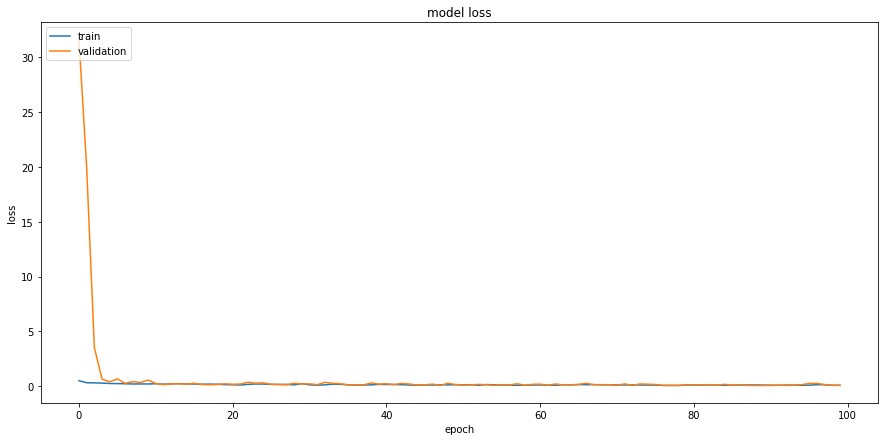

             |Training ok ...
RMSE_znorm            0.079944
bias_znorm            0.077659
std_znorm             0.077659
RMSE                  0.114605
|znorm| > 0.15 (%)    6.535948
|znorm| > 3std (%)    1.895425
Name: Redshift, dtype: float64


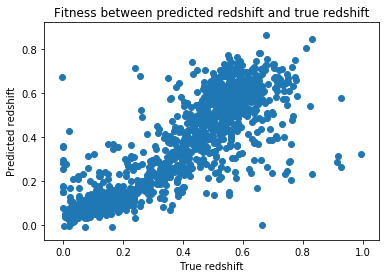

----------------------------------------- End ---------------------------------------


In [2]:
from utils2 import *
from keras.layers import Input as I
from utils import *

print('------------------------------------------------------------------ starting -----------------')
batch_size = 256
epoch = 100
data = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all/*.npy'

model = get_basic_residual_model(layer_number = 12, k = 3, start_size = 8)

print('           |Model built')

X_Train, Y_Train, X_Test, Y_Test, X_Valid, Y_Valid = get_train_test_valid_data_galaxy(data,dir_img,test_size=0.3, valid_size = 0.5)

history = model.fit(X_Train, Y_Train, validation_data=(X_Valid, Y_Valid), epochs=epoch, batch_size=batch_size, verbose=1)
#batch_size = 10#128
#data = '../data/csvs/galaxies/all1_.csv';
#dir_img = '../data/images/galaxies1/all'

#Saving ploting
save_model(model, './model_residual.json')
plot_history(history);

print('             |Training ok ...')

#Testing and ploting of result
predict = model.predict(X_Test, batch_size=batch_size).reshape(-1)
result = compute_metrics(Y_Test, predict, 'Redshift')     
print(result)
plot_result(Y_Test, predict)

print('----------------------------------------- End ---------------------------------------')

In [4]:
from utils2 import *
from keras.layers import Input

aa = get_basic_residual_block(Input(shape = (32,32,5)), 4)
aa.shape

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(4)])